<a href="https://colab.research.google.com/github/Nataliawijayaa/Vehicle_Ads_Analysis/blob/main/Car_Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors that Influence the Price of Vehicles

I am an analyst at Crankshaft List. Hundreds of free vehicle ads are posted on the website every day. I need to study the dataset from the past few years and determine the factors that influence the price of a vehicle.

#  Objectives:

Testing five hypotheses:
1. The age of the car affects the price of the car.
1. The odometer of the car affects the price of the car.
1. The condition of the car affects the price of the car.
1. The type of transmission of the car affects the price of the car.
1. The color of the car affects the price of the car.

# Stages:

Data regarding vehicle ads is stored in the file `/datasets/vehicles_us.csv`.
First, I will evaluate the data quality. Then, during the data preprocessing stage, I will attempt to address and fix any problematic data.

## Pre-Processing

In [1]:
# Load all libraries
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [3]:
# Load the data file into a DataFrame
df = pd.read_csv('/content/vehicles_us.csv')


### Data Exploration

The *dataset* contains the following columns:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, and others.
- `odometer` — the mileage of the vehicle when the ad was posted.
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type).
- `date_posted` — the date when the ad was posted.
- `days_listed` — the number of days the ad was listed before being removed.

In [4]:
# Display general information/summary about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# Display data sample
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
48717,32990,2014.0,ram 2500,excellent,6.0,diesel,73218.0,automatic,truck,red,1.0,2018-11-22,22
40608,14900,2009.0,toyota tacoma,excellent,6.0,gas,117000.0,automatic,pickup,NaN,NaN,2018-07-30,53
3621,8000,2010.0,ram 2500,good,8.0,gas,230000.0,automatic,truck,silver,1.0,2018-09-01,60
24150,22900,NaN,ford f150 supercrew cab xlt,good,6.0,gas,NaN,automatic,pickup,white,1.0,2018-06-03,17
27385,15995,2016.0,nissan maxima,excellent,6.0,gas,NaN,automatic,sedan,silver,NaN,2018-12-13,32
42106,11500,2007.0,toyota tacoma,good,6.0,gas,199000.0,automatic,pickup,silver,1.0,2019-03-18,34
26525,8995,2012.0,chevrolet equinox,excellent,4.0,gas,102812.0,automatic,SUV,black,1.0,2018-12-09,32
12120,1,2017.0,gmc sierra 1500,excellent,10.0,gas,66412.0,other,truck,white,1.0,2018-08-25,21
5587,4200,2008.0,chrysler town & country,good,NaN,gas,177000.0,automatic,mini-van,blue,NaN,2018-12-16,59
15915,30898,NaN,toyota tundra,excellent,8.0,gas,66337.0,automatic,truck,NaN,1.0,2018-12-12,29


There are several issues that require changes, such as filling in missing values in some columns and modifying inappropriate data types.

In [6]:
# There are missing values and inconsistent data types
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

There are 5 columns with inconsistent data types. The `model_year`, `cylinders`, and `days_listed` columns should be integers, while the `is_4wd` column should be boolean, and the `date_posted` column should be datetime.

In [7]:
# Calculate the missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The missing values are presented in 5 columns, namely: `is_4wd`, `paint_color`, `odometer`, `cylinders`, and `model_year`. Based on the sorted data, `is_4wd` is one of the columns with the highest number of missing values.

In [8]:
# Sorting missing values
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

### Conclusion and Next Phases:

Based on the available data, there are issues with the initial data, as there are still missing values and inconsistent data types. Therefore, the first step that needs to be addressed is handling the missing values and modifying the data types.

## Handling Missing Values

In [9]:
# `is_4wd`
df['is_4wd'].unique()

array([ 1., nan])

The conclusion derived from the `is_4wd` column is that a value of 1 represents True, and NaN values represent 0 or False. Therefore, first, I will convert the NaN values to 0 and later I will convert them to boolean values.

In [10]:
# Filling missing values
df['is_4wd'] = df['is_4wd'].fillna(0)

In [11]:
# `paint_color`
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

Changing the NaN values in the `paint_color` column to 'unknown' since I do not have clear information and cannot determine the actual color of the car.

In [ ]:
# filling missing values
df['paint_color'] = df['paint_color'].fillna('unknown')

In [12]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [13]:
# `odometer` 
# grouping the median of `odometer` based on `condition`
group_by_condition = df.groupby('condition').agg({'odometer':'median'})
group_by_condition

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [14]:
# filling missing values in `odometer`
for condition in df['condition'].unique():
    df.loc[(df['condition'] == condition) & (df['odometer'].isna()), 'odometer'] = \
    group_by_condition.loc[group_by_condition.index == condition, 'odometer'][0]
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [15]:
# grouping the median of `cylinders` and `model_year` based on `model`
group_by_model = df.groupby('model').agg({'cylinders':'median', 'model_year':'median'})
group_by_model

,cylinders,model_year
model,,
acura tl,6.0,2007.0
bmw x5,6.0,2010.0
buick enclave,6.0,2012.0
cadillac escalade,8.0,2009.0
chevrolet camaro,6.0,2013.0
...,...,...
toyota sienna,6.0,2008.0
toyota tacoma,6.0,2010.0
toyota tundra,8.0,2009.0


In [16]:
# filling missing values in `cylinders`
for model in df['model'].unique():
    df.loc[(df['model'] == model) & (df['cylinders'].isna()), 'cylinders'] = \
    group_by_model.loc[group_by_model.index == model, 'cylinders'][0]
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [17]:
# filling missing values in `model_year`
for model in df['model'].unique():
    df.loc[(df['model'] == model) & (df['model_year'].isna()), 'model_year'] = \
    group_by_model.loc[group_by_model.index == model, 'model_year'][0]
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

The missing values in the `is_4wd` column have been filled with a value of 0, and the `paint_color` column has been filled with 'unknown'. As for the `odometer` column, the missing values have been filled with the median based on the car's condition, and the `cylinders` and `model_year` columns have been filled with the median based on the car's model. After addressing the missing values in these columns, it can be concluded that the data is now complete, with no more missing values.

## Fixing the data types

In [18]:
# `model_year`, `cylinders`, and `days_listed` into integer
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['days_listed'] = df['days_listed'].astype('int')

In [19]:
# `is_4wd` into boolean
df['is_4wd'] = df['is_4wd'].astype('bool')

In [20]:
# `date_posted` into datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Improving data quality

In [21]:
# Add date and time values when the advertisement is displayed
df['year_posted'] = df['date_posted'].dt.year.astype('int')
df['month_posted'] = df['date_posted'].dt.month.astype('int')
df['week_posted'] = df['date_posted'].dt.weekday.astype('int')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,6,5
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018,10,2
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018,11,2
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,11,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018,7,0


In [22]:
# Add the age of the vehicle when the advertisement is displayed
df['age'] = df['year_posted'] - df['model_year'] + 1
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,6,5,8
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,2019,3,4,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018,10,2,6
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018,11,2,17
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,11,3,10
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018,7,0,6


In [23]:
# Add the average odometer of the vehicle
df['avg_odometer'] = df['odometer'] / df['age']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  week_posted   51525 non-null  int64 

In [24]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [25]:
# dictionary for `condition`
dict_condition = {'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}


In [26]:
df['condition_numeric'] = df['condition'].replace(dict_condition)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age,avg_odometer,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,6,5,8,18125.000000,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,2019,3,4,17,10683.117647,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667,3


## Checking the Cleaned Data

In [27]:
# Display general information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        42258 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  month_

In [28]:
# Display data sample
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age,avg_odometer,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,6,5,8,18125.000000,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,2019,3,4,17,10683.117647,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,6,2,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,12,3,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,1,0,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2018,7,0,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,2,4,12,12265.916667,3


## Learning Core Parameters

The parameters are:
* Price
* Age of the vehicle when the advertisement is displayed
* Odometer
* Number of cylinders
* Condition

,price
count,51525.000000
mean,12132.464920
std,10040.803015
min,1.000000
25%,5000.000000
50%,9000.000000
75%,16839.000000
max,375000.000000


array([[<Axes: title={'center': 'price'}>]], dtype=object)

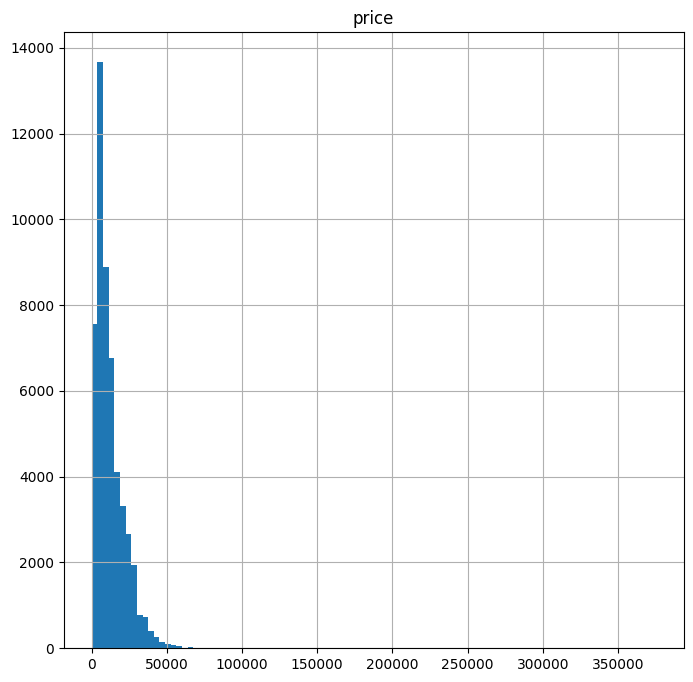

In [30]:
# price
display(df['price'].describe().to_frame())
df.hist('price', bins=100, figsize=(8,8))


<Axes: >

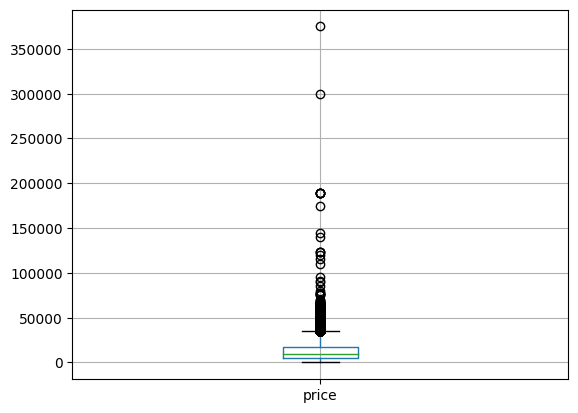

In [31]:
df.boxplot('price')

Based on the histogram above, there are outliers in the price data, as indicated by the right-skewed shape of the histogram. The presence of outliers in the price can also be observed from the box plot, which shows numerous outliers in the `price` column. Additionally, there are some peculiar data points, as the minimum price in the data is very low, at only 1, while the maximum price is extremely high, at 375,000.

,age
count,51525.000000
mean,9.513906
std,6.112976
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,111.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

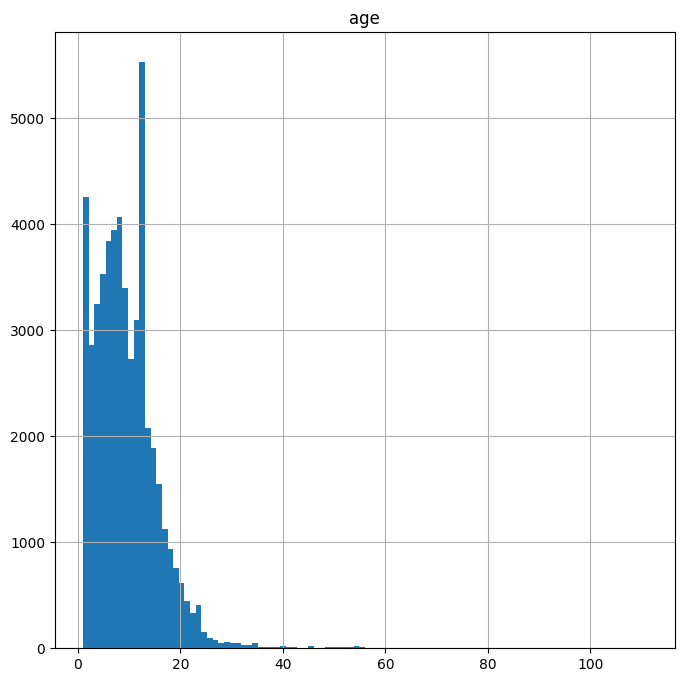

In [33]:
# age of vehicle
display(df['age'].describe().to_frame())
df.hist('age', bins=100, figsize=(8,8))


<Axes: >

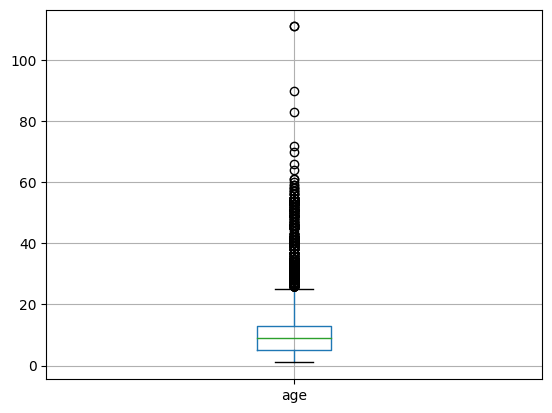

In [34]:
df.boxplot('age')

Based on the histogram of vehicle age, there are outliers as indicated by the right-skewed shape of the histogram. The presence of outliers in vehicle age can also be observed from the box plot, which shows numerous outliers in the `age` column. Additionally, there is some peculiar data where the vehicle age reaches 110 years, indicating some unusual values in the dataset.

,odometer
count,51525.000000
mean,115199.014508
std,60484.863376
min,0.000000
25%,75668.000000
50%,110908.000000
75%,147821.000000
max,990000.000000


array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

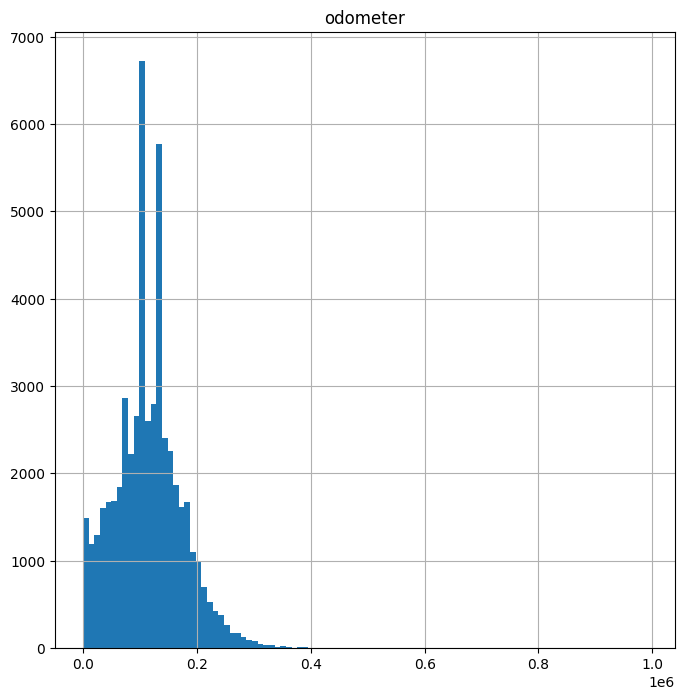

In [35]:
# odometer
display(df['odometer'].describe().to_frame())
df.hist('odometer', bins=100, figsize=(8,8))


<Axes: >

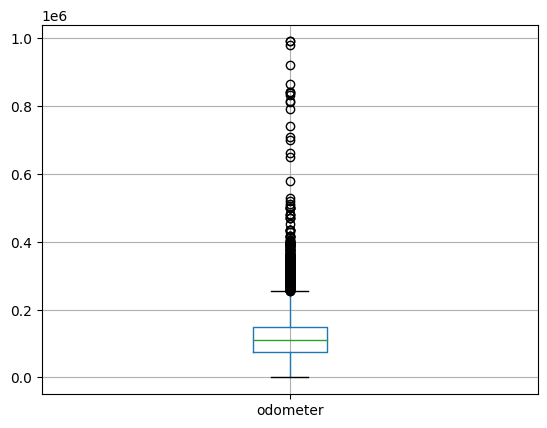

In [36]:
df.boxplot('odometer')

For the `odometer` column, there are outlier values that can be observed from both the histogram and the box plot. There are numerous data points above the maximum limit, indicated by the clustering of data points beyond the upper boundary. Additionally, the average mileage is 115,199, but there is a data point with a mileage of 990,000, indicating the presence of an outlier in the dataset.

,cylinders
count,51525.000000
mean,6.121067
std,1.657457
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


array([[<Axes: title={'center': 'cylinders'}>]], dtype=object)

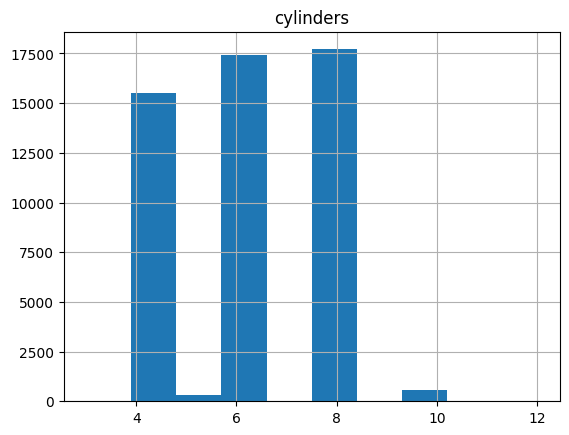

In [37]:
# number of cylinders
display(df['cylinders'].describe().to_frame())
df.hist('cylinders')


<Axes: >

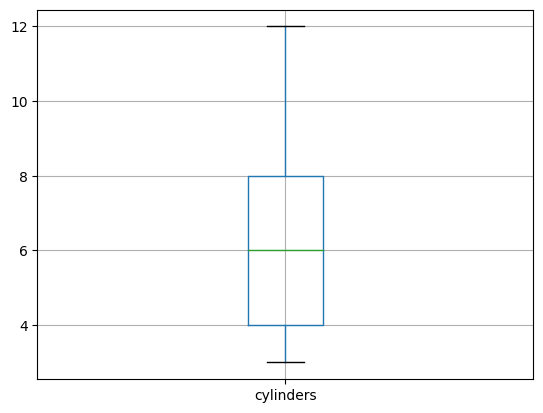

In [38]:
df.boxplot('cylinders')

The majority of car cylinders are 8, 6, and 4, and there are no outliers in the data.

array([[<Axes: title={'center': 'condition_numeric'}>]], dtype=object)

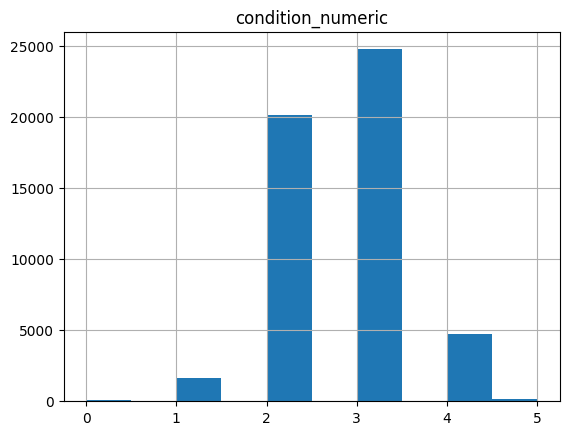

In [39]:
# condition
df.hist('condition_numeric')


<Axes: >

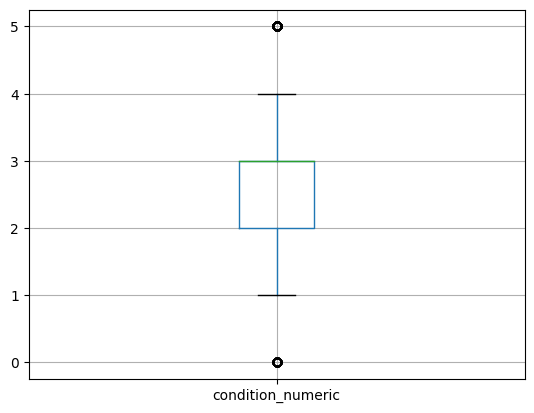

In [40]:
df.boxplot('condition_numeric')

Based on the histogram of car condition, the majority of car conditions fall into condition 3, which represents excellent condition, and condition 2, which represents good condition.

## Studying and Handling Outliers


In [41]:
# Determine the lower and upper bounds for outliers
list_of_selected_column = ['price', 'age', 'odometer']

def upper_lower_whisker(column_name):
    Q1  = df[column_name].quantile(0.25)
    Q3  = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    return lower_whisker, upper_whisker

df_final = df.copy()


In [42]:
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    df_final = df_final[(df_final[column] >= lower) & (df_final[column] <= upper)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  age
cleaning outlier on  age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


In [43]:
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    df_final = df_final[(df_final[column] >= lower) & (df_final[column] <= upper)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  age
cleaning outlier on  age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


<Axes: >

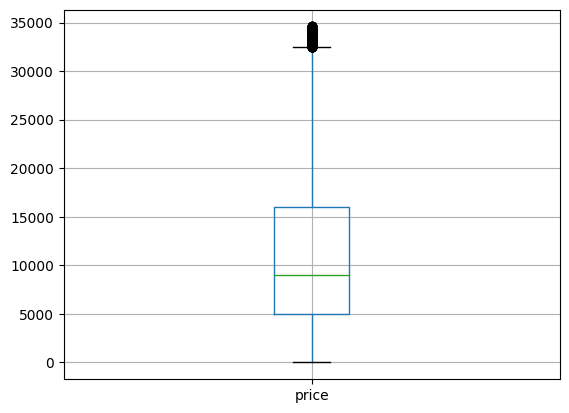

In [44]:
# boxplot price
df_final.boxplot('price')

<Axes: >

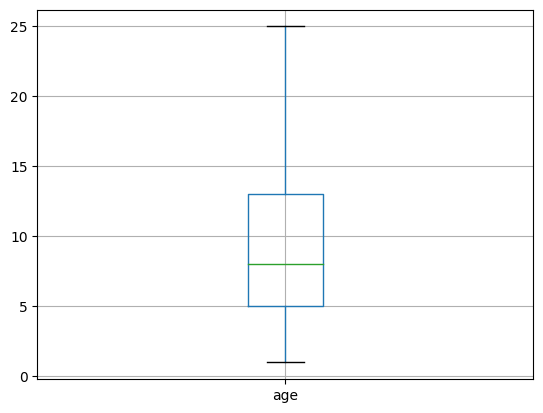

In [45]:
# boxplot age
df_final.boxplot('age')

<Axes: >

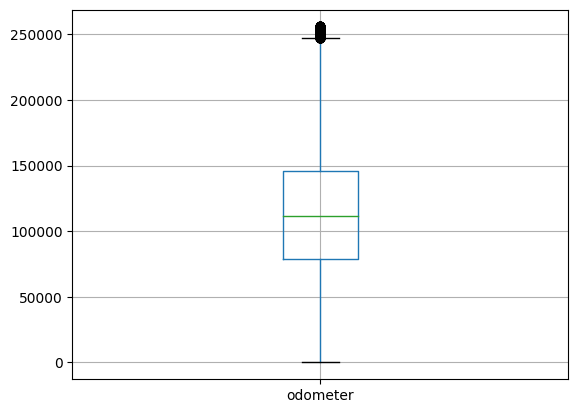

In [46]:
# boxplot odometer
df_final.boxplot('odometer')

## Studying Core Parameters without Outliers

,price
count,48288.000000
mean,11237.198000
std,7828.319978
min,1.000000
25%,5000.000000
50%,8995.000000
75%,15990.000000
max,34595.000000


array([[<Axes: title={'center': 'price'}>]], dtype=object)

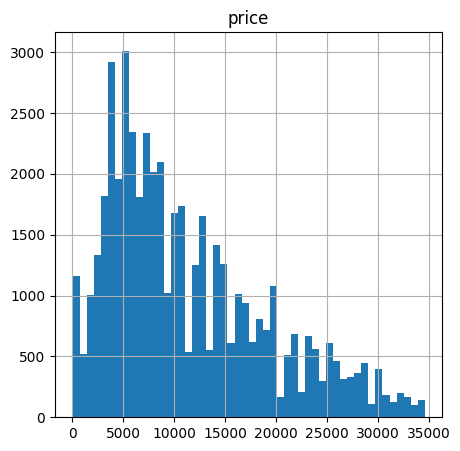

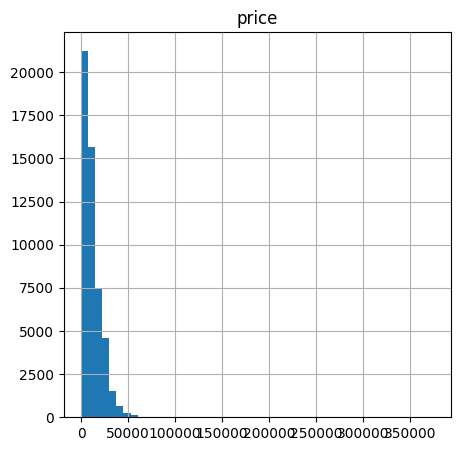

In [47]:
# price
display(df_final['price'].describe().to_frame())
df_final.hist('price', bins=50, figsize=(5,5))
df.hist('price', bins=50, figsize=(5,5))

Text(0.5, 1.0, 'Price after cleaning')

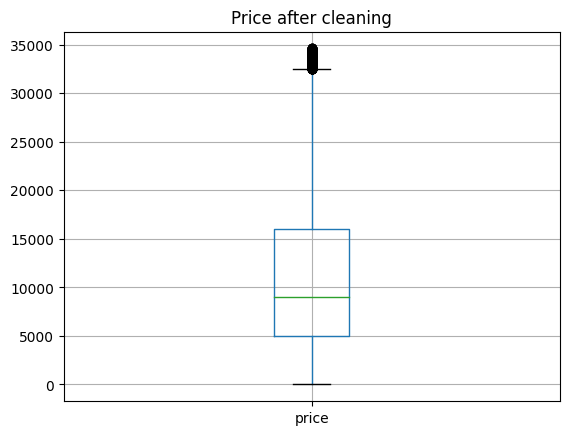

In [51]:
df_final.boxplot('price')
plt.title('Price after cleaning')

Text(0.5, 1.0, 'Price before cleaning')

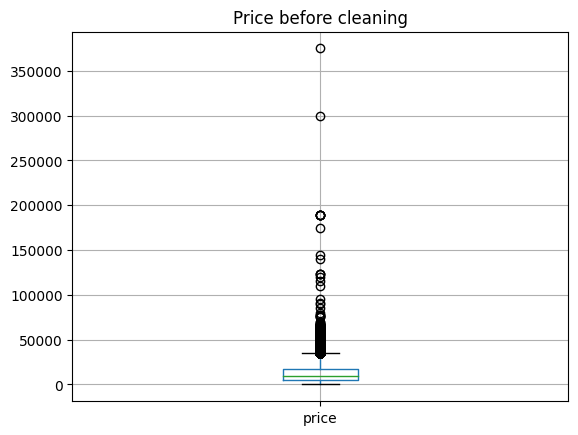

In [50]:
df.boxplot('price')
plt.title('Price before cleaning')

It can be observed that the boxplot for price without outliers provides clearer data, indicating that the majority of car prices are in the range of 5000 to 16000. 

,age
count,48288.000000
mean,9.221732
std,5.047407
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,25.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

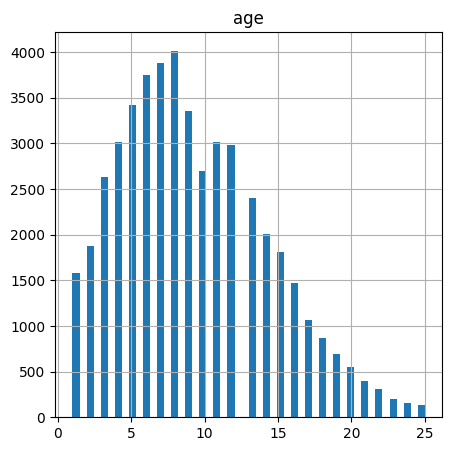

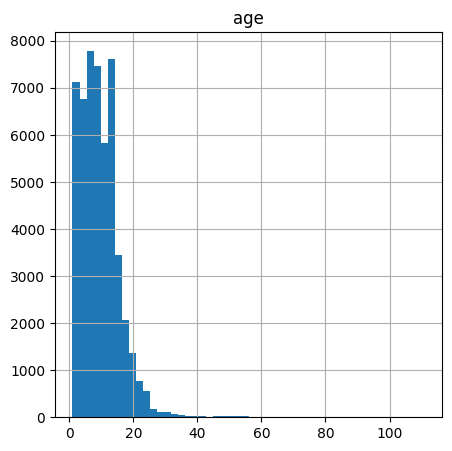

In [52]:
# age of vehicle
display(df_final['age'].describe().to_frame())
df_final.hist('age', bins=50, figsize=(5,5))
df.hist('age', bins=50, figsize=(5,5))

Text(0.5, 1.0, 'Age after cleaning')

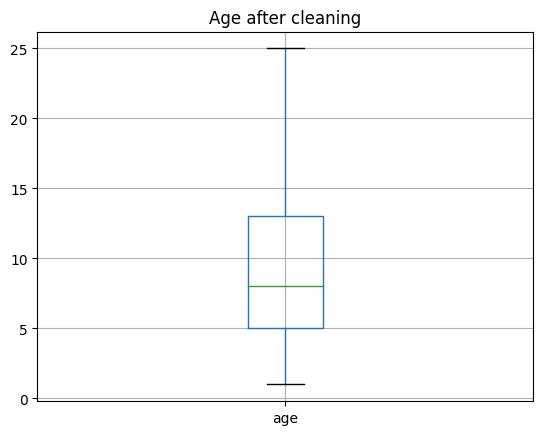

In [53]:
df_final.boxplot('age')
plt.title('Age after cleaning')

Text(0.5, 1.0, 'Age before cleaning')

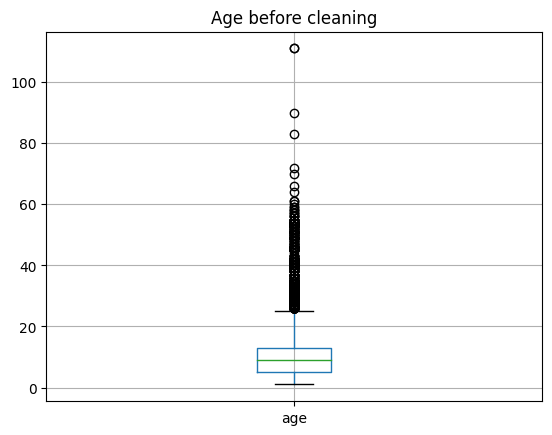

In [54]:
df.boxplot('age')
plt.title('Age before cleaning')

The boxplot for the age without outliers appears clearer and easier to understand, showing that the majority of vehicle ages are in the range of 5 to 13.

,odometer
count,48288.000000
mean,113704.112015
std,53137.266830
min,0.000000
25%,78669.500000
50%,111939.000000
75%,146000.000000
max,256000.000000


array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

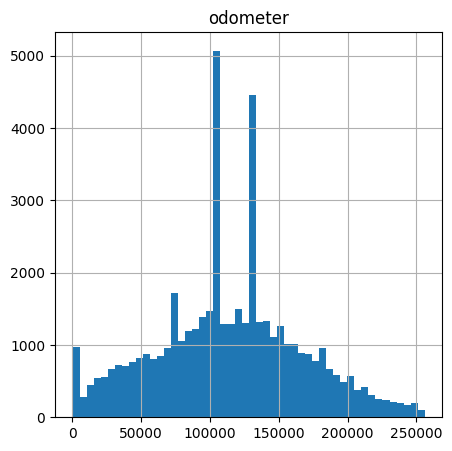

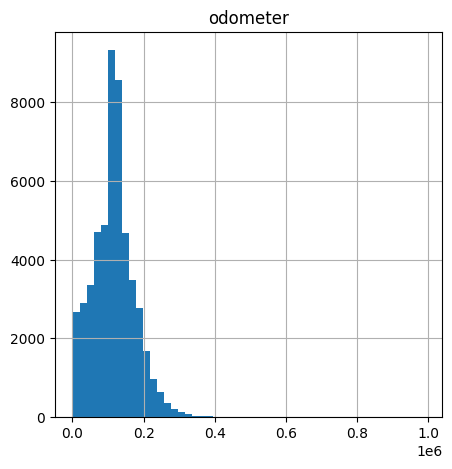

In [55]:
# odometer
display(df_final['odometer'].describe().to_frame())
df_final.hist('odometer', bins=50, figsize=(5,5))
df.hist('odometer', bins=50, figsize=(5,5))

Text(0.5, 1.0, 'Odometer after cleaning')

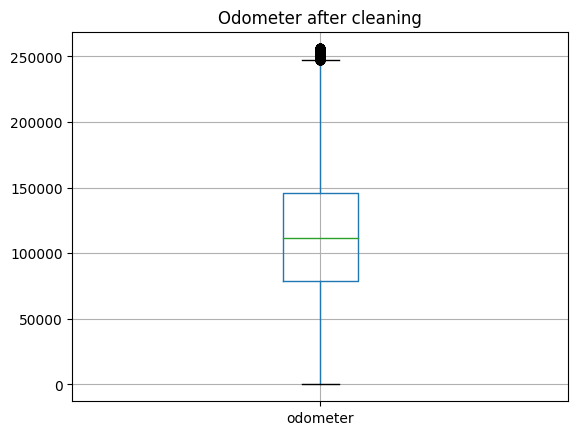

In [56]:
df_final.boxplot('odometer')
plt.title('Odometer after cleaning')

Text(0.5, 1.0, 'Odometer before cleaning')

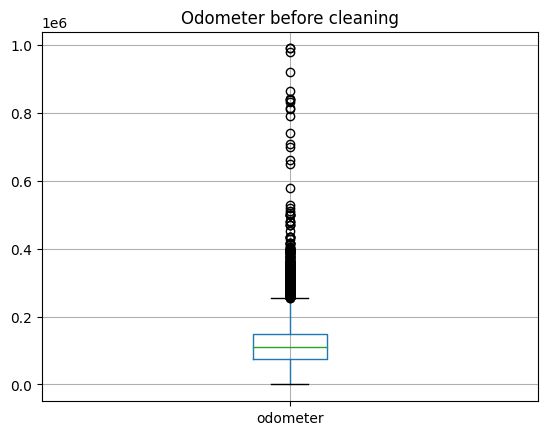

In [57]:
df.boxplot('odometer')
plt.title('Odometer before cleaning')

The histogram and boxplot of odometer without outliers provide a clearer view compared to those with outliers. Based on the box plot without outliers, the majority of cars have an odometer ranging from approximately 80,000 to 146,000.

## Advertisement Duration


In [58]:
df_final['days_listed'].describe()

count    48288.000000
mean        39.540735
std         28.213427
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Based on the description above, advertisements are generally displayed for a duration of 33 days. An advertisement can be considered as having a fast display time if it has a value below 19 days, and it is considered as a long display time if its value is above 53 days.

<Axes: >

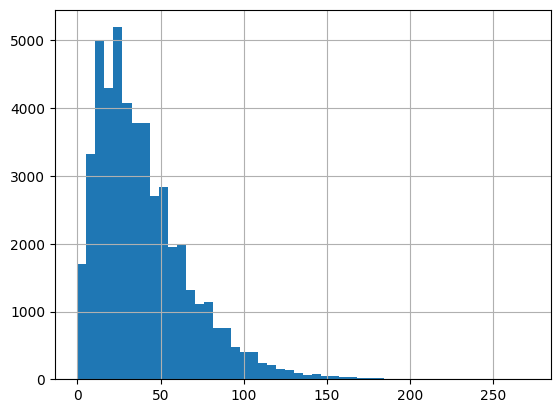

In [59]:
df_final['days_listed'].hist(bins=50)

## Average Price for Each Type of Vehicle

In [60]:
data_grouped = df_final.groupby('type').agg({'model':'count', 'price':'mean'})\
                .rename(columns={'model':'jumlah_iklan', 'price':'harga_rata-rata'})\
                .sort_values(by='jumlah_iklan', ascending=False)
data_grouped

,jumlah_iklan,harga_rata-rata
type,,
sedan,12008,6980.785643
SUV,11885,10463.461001
truck,11071,15155.546563
pickup,6273,15069.769967
coupe,2029,13480.889108
wagon,1500,8996.340667
mini-van,1141,8072.185802
hatchback,1006,6842.486083
van,578,8889.480969


<Axes: xlabel='type'>

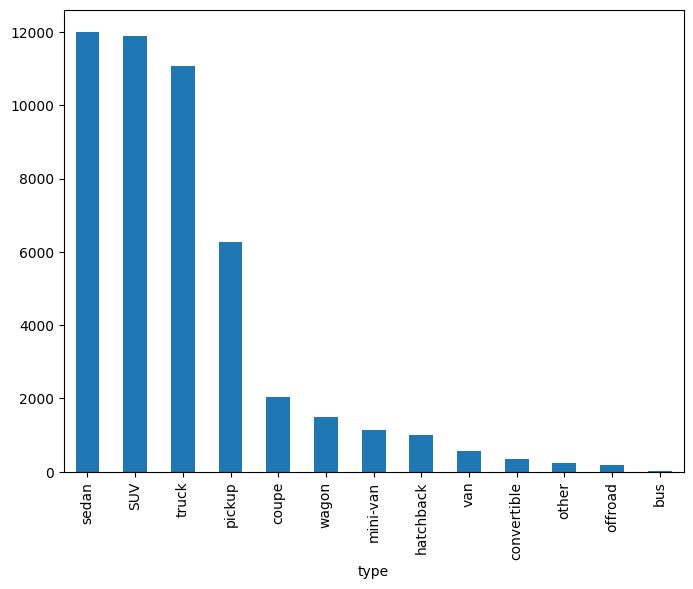

In [62]:
# Chart of Advertisements Count by Vehicle Type
data_grouped['jumlah_iklan'].plot(kind='bar', figsize=(8,6))

Based on the data above, Sedan and SUV vehicle types are the two types of vehicles with the highest number of advertisements.

## Price Factor

### Sedan

In [63]:
# Sedan type
df_sedan = df_final[df_final['type'] == 'sedan']
df_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age,avg_odometer,condition_numeric
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,6,2,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,12,3,4,19803.000000,3
11,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,2019,3,3,8,13892.750000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018,10,2,6,14689.333333,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018,11,2,17,10676.470588,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,11,3,10,12800.000000,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018,7,0,6,23262.166667,2


In [64]:
df_sedan['transmission'].value_counts()

automatic    11301
manual         575
other          132
Name: transmission, dtype: int64

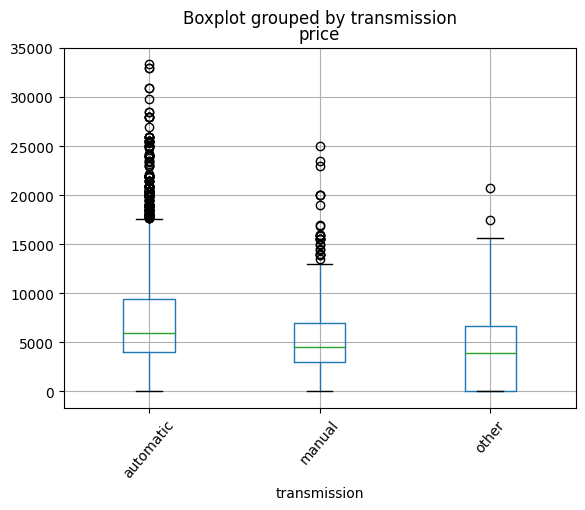

In [65]:
# All categories of transmission > 50
# Boxplot of transmission for sedans
df_sedan.boxplot('price', by = 'transmission')
plt.xticks(rotation = 50)
plt.show()

From the above boxplot categorized by transmission, it can be concluded that the price of a sedan car depends on its transmission. Sedans with automatic transmission tend to have higher prices compared to manual sedans.

In [66]:
df_sedan['paint_color'].value_counts()

silver    2032
black     1757
grey      1609
white     1490
blue      1220
red        934
custom     296
brown      254
green      202
purple      23
yellow      21
orange       9
Name: paint_color, dtype: int64

In [67]:
# Filtering the `color` column with less than 50 ads.
df_sedan_color = df_sedan.loc[~df_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
df_sedan_color['paint_color'].value_counts()

silver    2032
black     1757
grey      1609
white     1490
blue      1220
red        934
custom     296
brown      254
green      202
Name: paint_color, dtype: int64

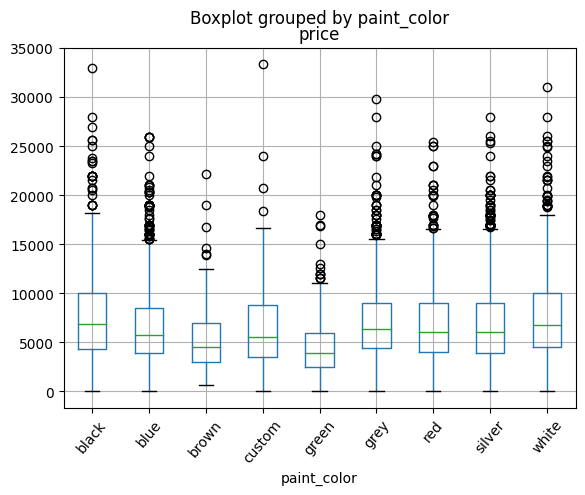

In [68]:
# Boxplot of the `color` column for sedans.
df_sedan_color.boxplot('price', by = 'paint_color')
plt.xticks(rotation = 50)
plt.show()

The above boxplot categorized by color shows that the price of sedans with black and white colors tends to be higher compared to other colors. On the other hand, Sedans with green color have the lowest price compared to other colors.

<function matplotlib.pyplot.show(close=None, block=None)>

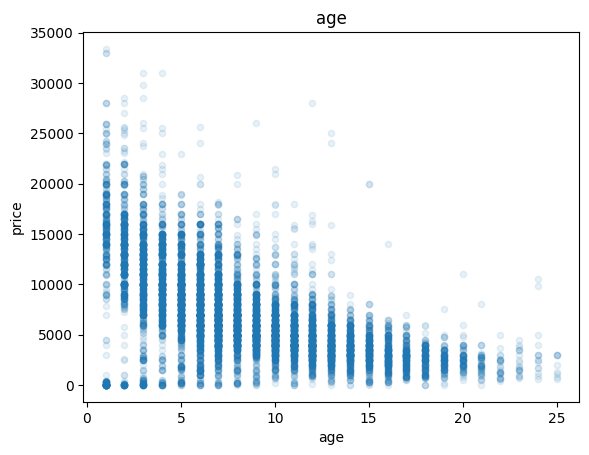

In [70]:
# Scatterplot of sedan age
df_sedan.plot(x = 'age', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('age')
plt.show

Based on the above scatterplot, it can be concluded that price is dependent on the age of the sedan, where the older the sedan, the lower the price, and vice versa.

<function matplotlib.pyplot.show(close=None, block=None)>

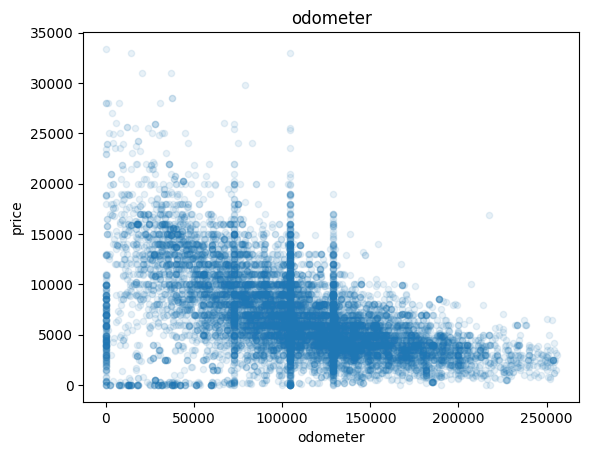

In [72]:
# scatterplot of sedan odometer
df_sedan.plot(x = 'odometer', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('odometer')
plt.show

Based on the above scatterplot, it can be concluded that price is dependent on the odometer of the vehicle, where the higher the odometer, the lower the price, and vice versa.

<function matplotlib.pyplot.show(close=None, block=None)>

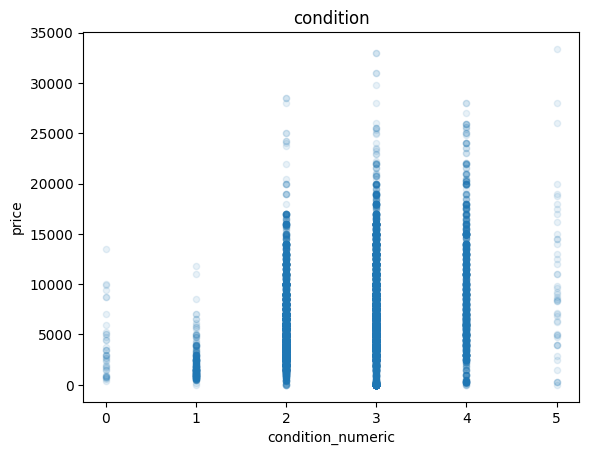

In [73]:
# scatterplot of sedan condition
df_sedan.plot(x = 'condition_numeric', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('condition')
plt.show

Based on the above scatterplot, it can be concluded that the condition of the car affects the price, where the better the condition of the car, the higher the price.

### SUV

In [74]:
# SUV type
df_suv = df_final[df_final['type'] == 'SUV']
df_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age,avg_odometer,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,6,5,8,18125.000000,2
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,1,0,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2018,7,0,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,2,4,12,12265.916667,3
14,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,2019,1,3,11,12025.909091,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,NaN,True,2019-03-05,1,2019,3,1,8,18062.500000,2
51496,4999,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,NaN,True,2018-05-26,59,2018,5,5,17,10464.764706,3
51500,6995,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,2018,8,5,7,22428.571429,3
51502,7995,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,NaN,False,2019-04-01,175,2019,4,0,9,12343.111111,4


In [75]:
df_suv['transmission'].value_counts()

automatic    11267
manual         460
other          158
Name: transmission, dtype: int64

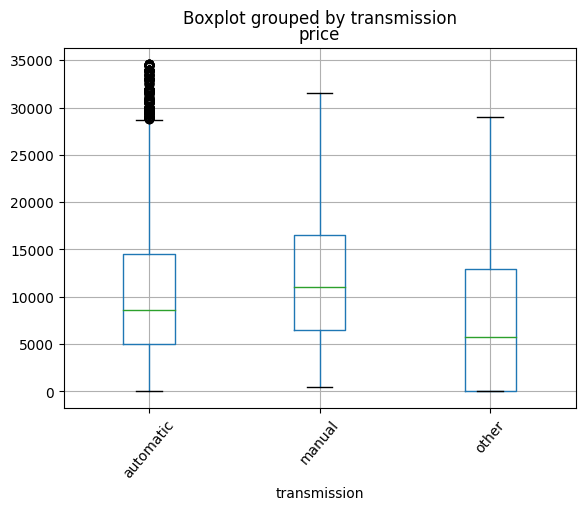

In [76]:
# boxplot of SUV transmission
df_suv.boxplot('price', by='transmission')
plt.xticks(rotation = 50)
plt.show()

Based on the above boxplot, it can be concluded that the transmission of the car affects its price, where the price of manual SUV tends to be higher than automatic SUV.

In [77]:
df_suv['paint_color'].value_counts()

black     2090
white     1869
silver    1530
grey      1146
blue      1011
red        872
green      413
brown      351
custom     298
orange      81
yellow      45
purple      38
Name: paint_color, dtype: int64

In [78]:
# Filtering the column `color` with less than 50 ads.
df_suv_color = df_suv[~df_suv['paint_color'].isin(['yellow', 'purple'])]
df_suv_color['paint_color'].value_counts()

black     2090
white     1869
silver    1530
grey      1146
blue      1011
red        872
green      413
brown      351
custom     298
orange      81
Name: paint_color, dtype: int64

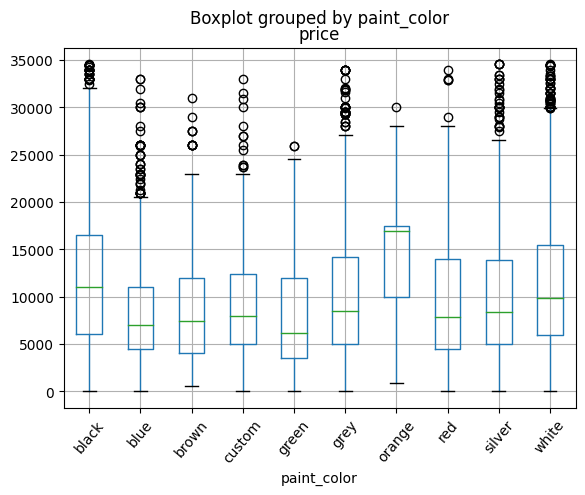

In [79]:
# Boxplot of the `color` column for SUV
df_suv_color.boxplot('price', by='paint_color')
plt.xticks(rotation = 50)
plt.show()

The above boxplot categorized by color indicates that the price of SUV vehicles in orange tends to be higher compared to other colors. Meanwhile, SUV vehicles in green have the lowest price among the other colors.

<function matplotlib.pyplot.show(close=None, block=None)>

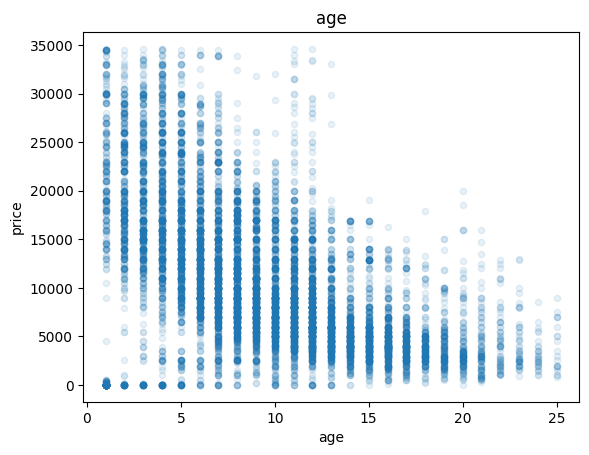

In [80]:
# scatterplot of SUV age
df_suv.plot(x = 'age', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('age')
plt.show

Based on the scatterplot above, it can be concluded that the price of SUV vehicles is dependent on their age. The higher the age of the SUV vehicle, the lower its price tends to be, and vice versa.

<function matplotlib.pyplot.show(close=None, block=None)>

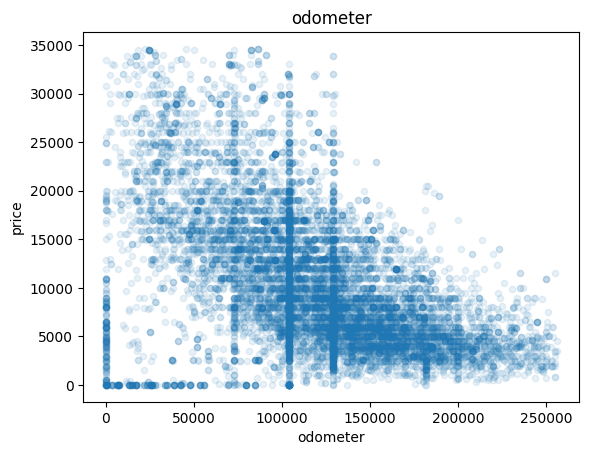

In [81]:
# scatterplot of SUV odometer
df_suv.plot(x = 'odometer', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('odometer')
plt.show

Based on the scatterplot above, it can be concluded that the price is dependent on the odometer of the vehicle. The farther the odometer, the lower the price tends to be, and vice versa.

<function matplotlib.pyplot.show(close=None, block=None)>

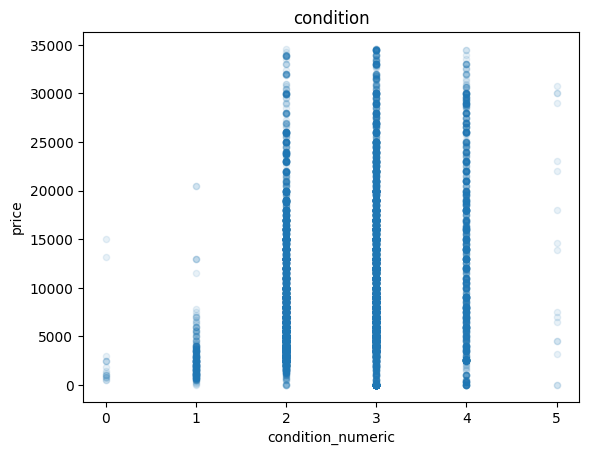

In [82]:
# scatterplot of SUV condition
df_suv.plot(x = 'condition_numeric', y = 'price', kind = 'scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.title('condition')
plt.show

Based on the scatterplot above, it can be concluded that the condition of the vehicle affects its price. The better the condition of the car, the higher the price tends to be.

## Conclusion

Each row in the table stores data related to vehicle advertisements displayed on the website. There are various columns that store data about each vehicle, such as the vehicle's price, production year, model, cylinders, fuel type, transmission, type, car color, and whether the vehicle has a four-wheel drive. The rest of the columns contain information related to the condition of the car at the time the advertisement was displayed, such as the car's condition, odometer, date the advertisement was displayed, and the number of days the advertisement was displayed until it was removed.

The current data is sufficient for analysis and hypothesis testing. However, there are still missing values in the data. Therefore, before proceeding with the data analysis, we need to preprocess the data.

General conclusions about the vehicle advertisement data:
* Our dataset consists of 51,525 rows and 13 columns.
* Some columns have missing values: `is_4wd`, `paint_color`, `odometer`, `cylinders`, and `model_year`.
* The missing values in the `is_4wd` column are filled with the value 0, and the `paint_color` column is filled with "unknown". For the `odometer` column, missing values are filled with the median based on the car's condition, and `cylinders` and `model_year` are filled with the median based on the car's model.
* We then change the data types that are not appropriate in the dataset: `model_year`, `cylinders`, and `days_listed` are converted to `int`, `is_4wd` is converted to `bool`, and `date_posted` is converted to `datetime`.
* We add some columns to improve the data quality: `year_posted`, `month_posted`, `week_posted`, `age`, and `avg_odometer`.
* Columns with outlier values such as `price`, `age`, and `odometer` are handled and filtered out.
* Missing values and outliers may occur due to data entry errors or system errors.

Before analyzing the vehicle advertisement dataset, I suspect that the age of the car, mileage, car condition, transmission type, and car color affect the car's price.

After analyzing the data on vehicle advertisements, it can be concluded that:
1. The age of the car affects the car's price.
1. The odometer of the car affects the car's price.
1. The condition of the car affects the car's price.
1. The transmission type of the car affects the car's price.
1. The color of the car affects the car's price.




